In [298]:
import pandas as pd
import os
import kagglehub
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

path = kagglehub.dataset_download("mysarahmadbhat/lung-cancer")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Files in dataset folder:", files)

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)
        data = pd.read_csv(file_path)

Path to dataset files: C:\Users\badro97\.cache\kagglehub\datasets\mysarahmadbhat\lung-cancer\versions\1
Files in dataset folder: ['survey lung cancer.csv']


In [139]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [141]:
data.shape

(309, 16)

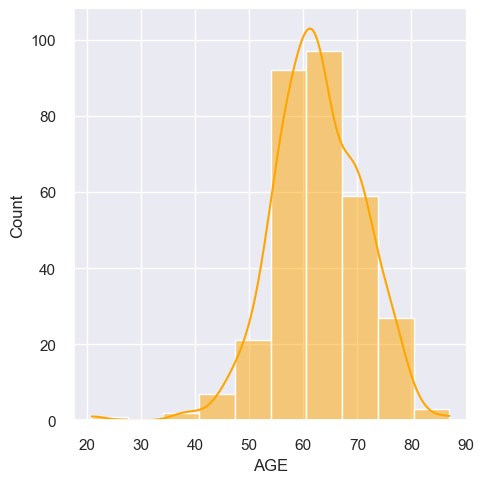

In [142]:
# 나이 분포
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(data["AGE"], kde=True, color="orange", bins=10)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23160\2494604751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "GENDER", data=data, palette="mako")


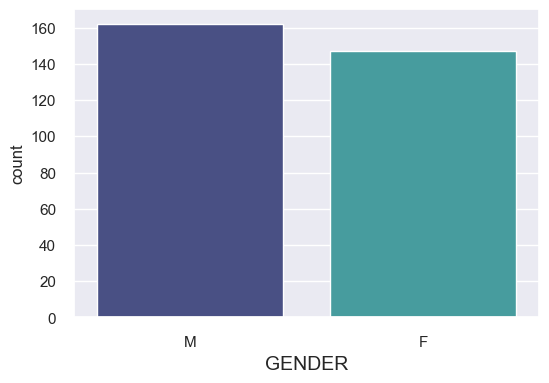

In [143]:
# 성별 분포
plt.figure(figsize=(6,4))
sns.countplot(x = "GENDER", data=data, palette="mako")
plt.xlabel("GENDER", fontsize=14)
plt.show()

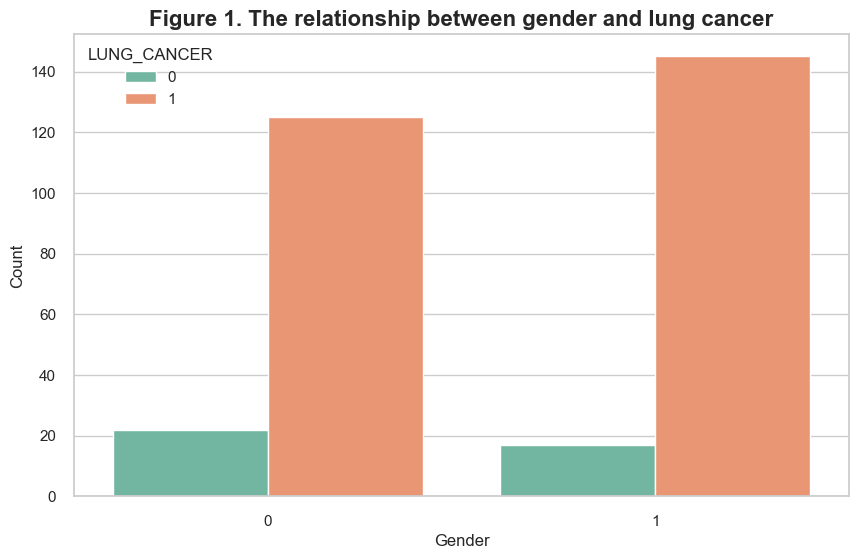

<Figure size 1000x600 with 0 Axes>

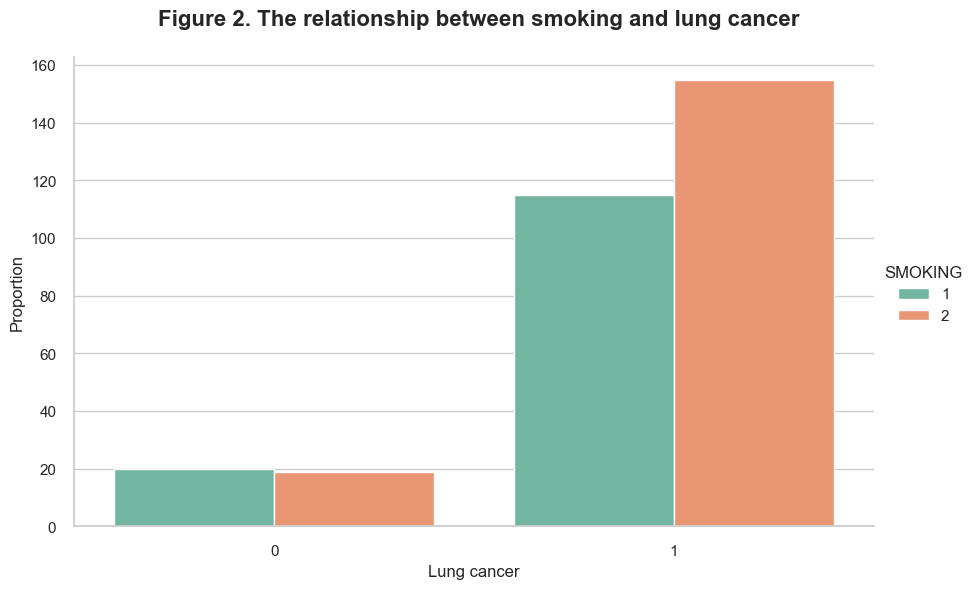

In [313]:
# Figure 1
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='GENDER', hue='LUNG_CANCER', palette='Set2')
plt.title('Figure 1. The relationship between gender and lung cancer', fontsize=16, weight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Figure 2
plt.figure(figsize=(10, 6))
sns.catplot(
    data=data, 
    x='LUNG_CANCER', 
    hue='SMOKING', 
    kind='count', 
    height=6, 
    aspect=1.5, 
    palette='Set2'
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Figure 2. The relationship between smoking and lung cancer', fontsize=16, weight='bold')
plt.xlabel('Lung cancer')
plt.ylabel('Proportion')
plt.show()


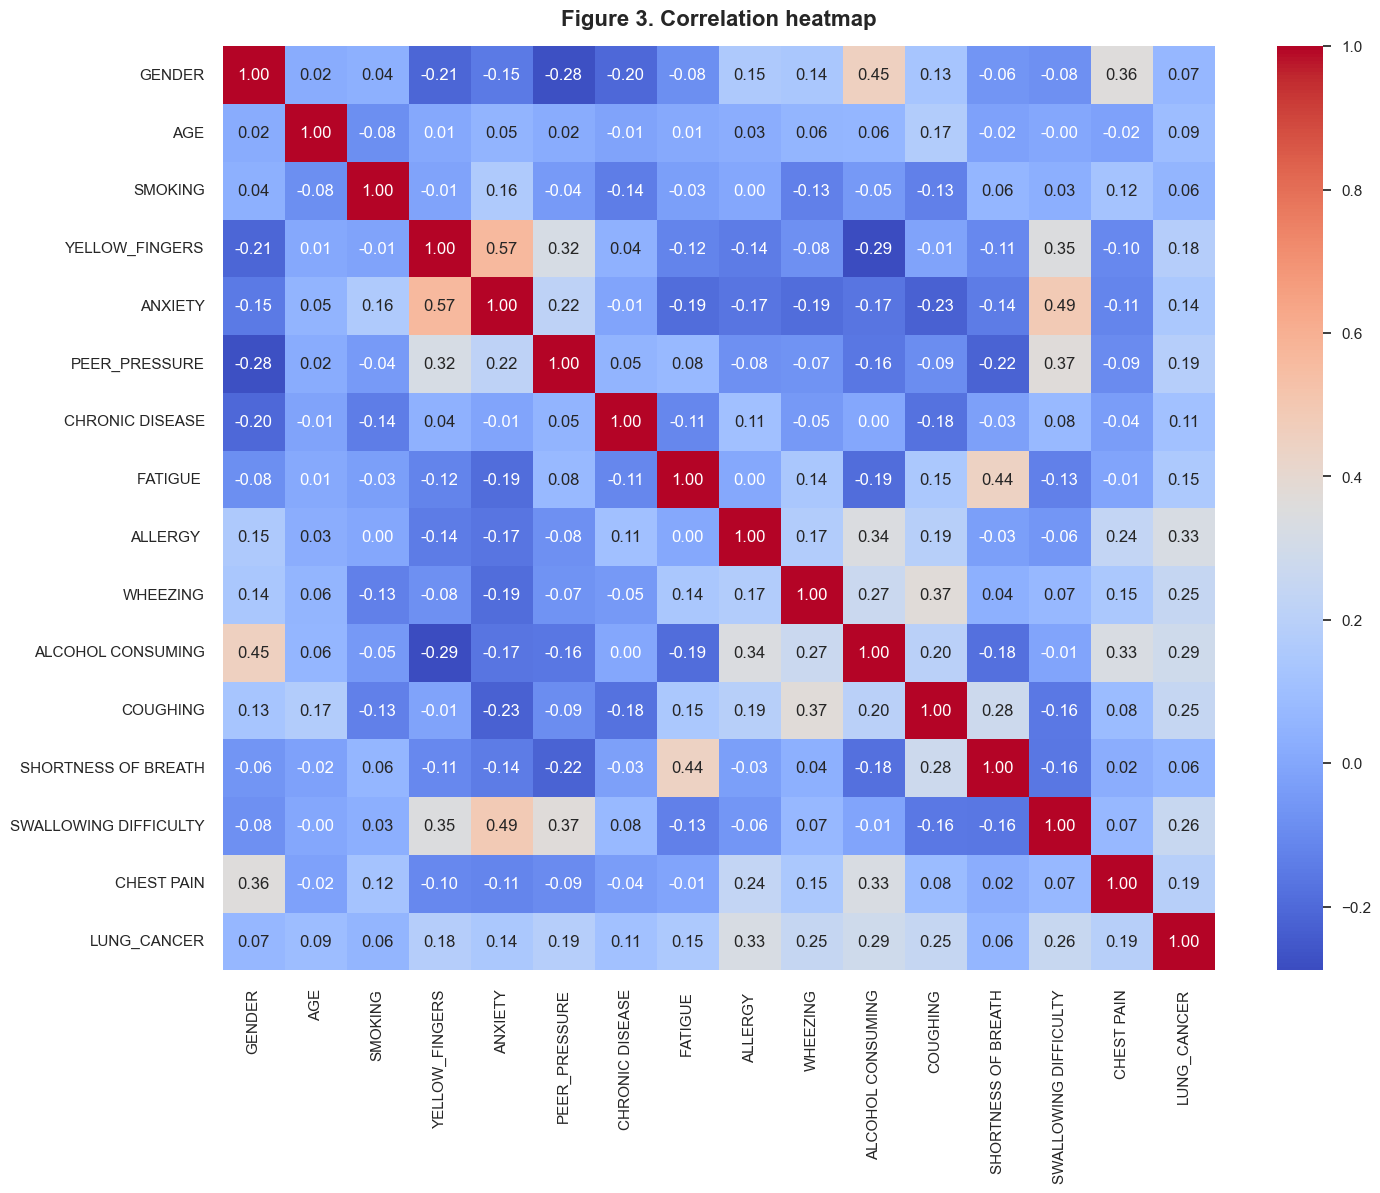

상관계수 높은 변수 쌍:
GENDER               YELLOW_FINGERS        -0.212959
YELLOW_FINGERS       GENDER                -0.212959
PEER_PRESSURE        SHORTNESS OF BREATH   -0.220175
SHORTNESS OF BREATH  PEER_PRESSURE         -0.220175
ANXIETY              COUGHING              -0.225644
COUGHING             ANXIETY               -0.225644
GENDER               PEER_PRESSURE         -0.275564
PEER_PRESSURE        GENDER                -0.275564
YELLOW_FINGERS       ALCOHOL CONSUMING     -0.289025
ALCOHOL CONSUMING    YELLOW_FINGERS        -0.289025
dtype: float64


In [310]:
label_encoder = LabelEncoder()
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])

numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Figure 3. Correlation heatmap', fontsize=16, weight='bold', pad=15)
plt.show()


# 다중공선성이 의심되는 변수 확인
high_corr_pairs = corr.unstack().sort_values(kind="quicksort", ascending=False)
print("상관계수 높은 변수 쌍:")
print(high_corr_pairs[high_corr_pairs < 1].tail(10))  # 상위 상관 변수 확인

다중공선성...

In [146]:
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=1935)

#표준화 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 학습 데이터로 스케일링 학습
X_test_scaled = scaler.transform(X_test)

# PCA 적용
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  

print("PCA 적용된 학습 데이터 Shape:", X_train_pca.shape)
print("PCA 적용된 테스트 데이터 Shape:", X_test_pca.shape)

PCA 적용된 학습 데이터 Shape: (247, 15)
PCA 적용된 테스트 데이터 Shape: (62, 15)


In [147]:
# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.18829563 0.1377818  0.10391818 0.0903405  0.07342243 0.06507746
 0.05942504 0.0516539  0.05002928 0.04108674 0.03947431 0.03275092
 0.02834999 0.02132515 0.01706868]


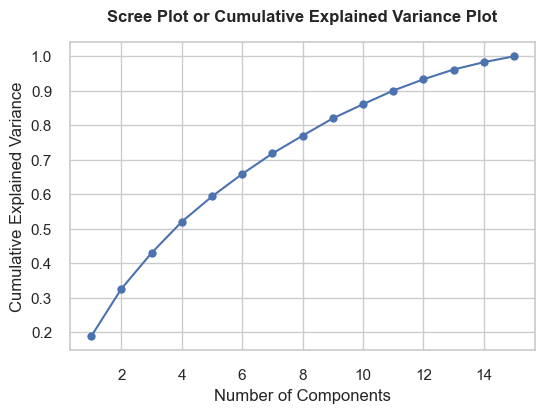

In [308]:
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot', weight='bold', pad=15)
plt.grid(True)
plt.show()

In [149]:
# PCA를 활용한 데이터 차원 축소 과정
desired_variance = 0.95  # 95% 분산 유지
num_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"\nNumber of components selected for {desired_variance * 100}% variance: {num_components}")


Number of components selected for 95.0% variance: 13


In [150]:
# 선택한 주성분 개수로 PCA 재적용
pca = PCA(n_components=num_components)
X_train_pca_selected = pca.fit_transform(X_train_scaled)
X_test_pca_selected = pca.transform(X_test_scaled)

In [151]:
print(f"\nFinal shape of training data: {X_train_pca_selected.shape}")
print(f"Final shape of testing data: {X_test_pca_selected.shape}")


Final shape of training data: (247, 13)
Final shape of testing data: (62, 13)


### Logit

In [177]:
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# 상수열 추가 (절편을 위한)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Logit 모델 학습
logit_model = sm.Logit(y_train, X_train_const).fit()

# 테스트 데이터 예측
logit_preds_prob = logit_model.predict(X_test_const)
logit_preds = (logit_preds_prob > 0.5).astype(int)

# 모델 평가
logit_auc = roc_auc_score(y_test, logit_preds_prob)
logit_confusion = confusion_matrix(y_test, logit_preds)
logit_class_report = classification_report(y_test, logit_preds)

print("Logit AUC:", logit_auc)
print("Confusion Matrix:\n", logit_confusion)
print("Classification Report:\n", logit_class_report)


Optimization terminated successfully.
         Current function value: 0.129461
         Iterations 10
Logit AUC: 0.8736842105263158
Confusion Matrix:
 [[ 2  3]
 [ 2 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.95      0.96      0.96        57

    accuracy                           0.92        62
   macro avg       0.72      0.68      0.70        62
weighted avg       0.91      0.92      0.92        62



In [187]:
# Logit 모델 요약
logit_summary = logit_model.summary2().tables[1]

logit_df = pd.DataFrame({
    "coef": logit_summary["Coef."],
    "std error": logit_summary["Std.Err."],
    "p-value": logit_summary["P>|z|"],
    "2.5%": logit_summary["[0.025"],
    "97.5%": logit_summary["0.975]"]
})
logit_df

,coef,std error,p-value,2.5%,97.5%
const,-39.142462,7.587576,2.485948e-07,-54.013838,-24.271086
GENDER,-0.680306,0.888085,4.436543e-01,-2.420920,1.060308
AGE,0.049092,0.037656,1.923389e-01,-0.024713,0.122897
SMOKING,3.023272,0.968083,1.790508e-03,1.125863,4.920681
YELLOW_FINGERS,1.326362,0.932750,1.550291e-01,-0.501795,3.154519
ANXIETY,0.928038,0.960909,3.341485e-01,-0.955309,2.811385
PEER_PRESSURE,2.472571,0.881734,5.043941e-03,0.744404,4.200737
CHRONIC DISEASE,3.885044,1.129900,5.851729e-04,1.670480,6.099608
FATIGUE,3.742456,1.032015,2.874466e-04,1.719744,5.765168
ALLERGY,1.554282,0.906777,8.651534e-02,-0.222968,3.331532


In [167]:
# Logit 모델 AIC, BIC
logit_aic = logit_model.aic
logit_bic = logit_model.bic
print("Logit AIC:", logit_aic)
print("Logit BIC:", logit_bic)

Logit AIC: 95.95355095237996
Logit BIC: 152.1037643384276


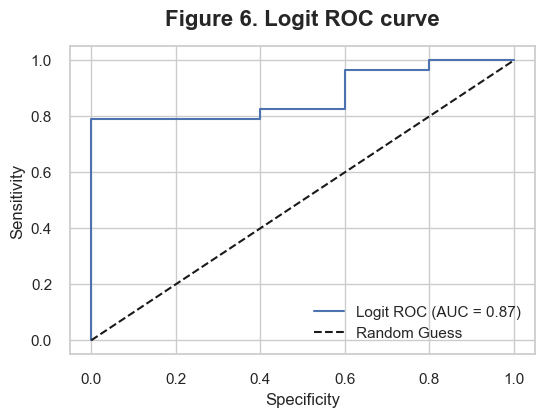

In [314]:
# Logit ROC 곡선
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_preds_prob)
logit_roc_auc = auc(logit_fpr, logit_tpr)

plt.figure()
plt.plot(logit_fpr, logit_tpr, label=f'Logit ROC (AUC = {logit_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('Figure 6. Logit ROC curve', fontsize=16 ,weight='bold', pad=15)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc='lower right')
plt.show()

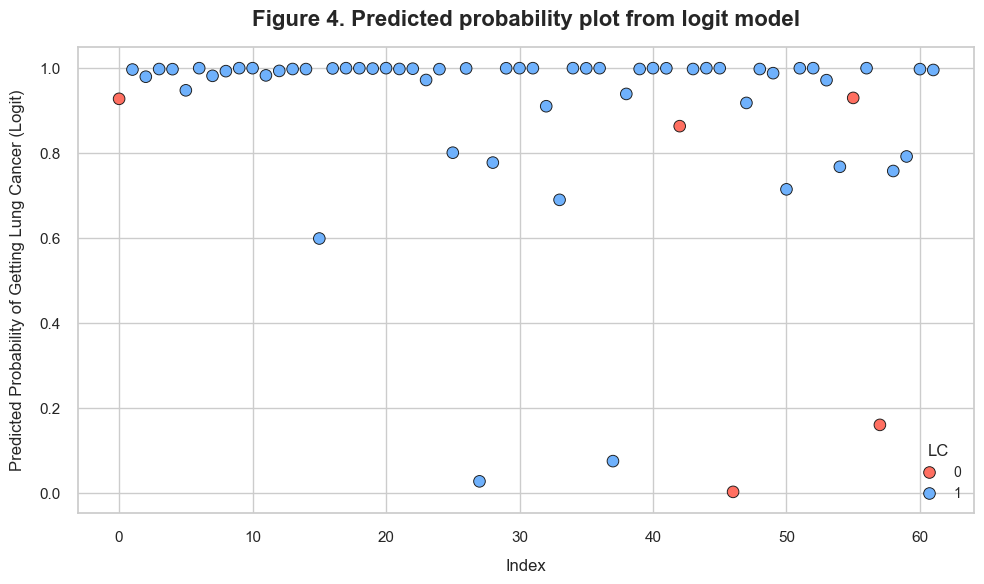

In [208]:
# 예측 확률 및 실제값 정리
data_logit = pd.DataFrame({
    'Index': range(len(logit_preds_prob)),
    'Predicted Probability': logit_preds_prob,
    'LC': y_test
})

sns.set_theme(style="whitegrid")

# Logit 모델 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_logit,
    x='Index',
    y='Predicted Probability',
    hue='LC',
    palette={0: '#FF6F61', 1: '#6FB1FC'},
    edgecolor='k',
    s=70 
)
plt.title('Figure 4. Predicted probability plot from logit model', fontsize=16, weight='bold', pad=15)
plt.xlabel('Index', fontsize=12, labelpad=10)
plt.ylabel('Predicted Probability of Getting Lung Cancer (Logit)', fontsize=12, labelpad=10)
plt.legend(title='LC', loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

### Probit

In [182]:
# Probit 모델 학습
probit_model = sm.Probit(y_train, X_train_const).fit()

# 테스트 데이터 예측
probit_preds_prob = probit_model.predict(X_test_const)
probit_preds = (probit_preds_prob > 0.5).astype(int)

# 모델 평가
probit_auc = roc_auc_score(y_test, probit_preds_prob)
probit_confusion = confusion_matrix(y_test, probit_preds)
probit_class_report = classification_report(y_test, probit_preds)

print("Probit AUC:", probit_auc)
print("Confusion Matrix:\n", probit_confusion)
print("Classification Report:\n", probit_class_report)


Optimization terminated successfully.
         Current function value: 0.128581
         Iterations 9
Probit AUC: 0.8842105263157894
Confusion Matrix:
 [[ 2  3]
 [ 2 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.95      0.96      0.96        57

    accuracy                           0.92        62
   macro avg       0.72      0.68      0.70        62
weighted avg       0.91      0.92      0.92        62



In [186]:
# Probit 모델 요약
probit_summary = probit_model.summary2().tables[1]

probit_df = pd.DataFrame({
    "coef": probit_summary["Coef."],
    "std error": probit_summary["Std.Err."],
    "p-value": probit_summary["P>|z|"],
    "2.5%": probit_summary["[0.025"],
    "97.5%": probit_summary["0.975]"]
})
probit_df

,coef,std error,p-value,2.5%,97.5%
const,-21.603868,3.909408,3.273854e-08,-29.266168,-13.941569
GENDER,-0.344718,0.480142,4.727874e-01,-1.285779,0.596342
AGE,0.024344,0.021208,2.510321e-01,-0.017223,0.065910
SMOKING,1.697225,0.513402,9.469139e-04,0.690976,2.703473
YELLOW_FINGERS,0.809913,0.527554,1.247296e-01,-0.224075,1.843900
ANXIETY,0.480480,0.531553,3.660393e-01,-0.561345,1.522305
PEER_PRESSURE,1.378971,0.469342,3.302383e-03,0.459077,2.298864
CHRONIC DISEASE,2.128202,0.605698,4.420229e-04,0.941055,3.315348
FATIGUE,2.157850,0.553220,9.598373e-05,1.073558,3.242142
ALLERGY,0.869003,0.488857,7.546598e-02,-0.089139,1.827145


In [168]:
# Probit 모델 AIC, BIC
probit_aic = probit_model.aic
probit_bic = probit_model.bic
print("Probit AIC:", probit_aic)
print("Probit BIC:", probit_bic)

Probit AIC: 95.51902000432204
Probit BIC: 151.6692333903697


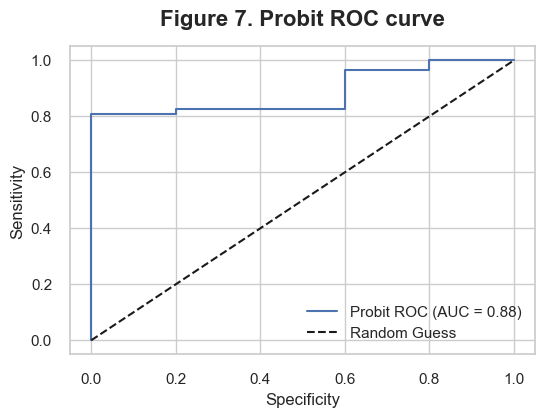

In [315]:
# Probit ROC 곡선
probit_fpr, probit_tpr, _ = roc_curve(y_test, probit_preds_prob)
probit_roc_auc = auc(probit_fpr, probit_tpr)

# Probit ROC 곡선
plt.figure()
plt.plot(probit_fpr, probit_tpr, label=f'Probit ROC (AUC = {probit_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('Figure 7. Probit ROC curve', fontsize=16 ,weight='bold', pad=15)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc='lower right')
plt.show()

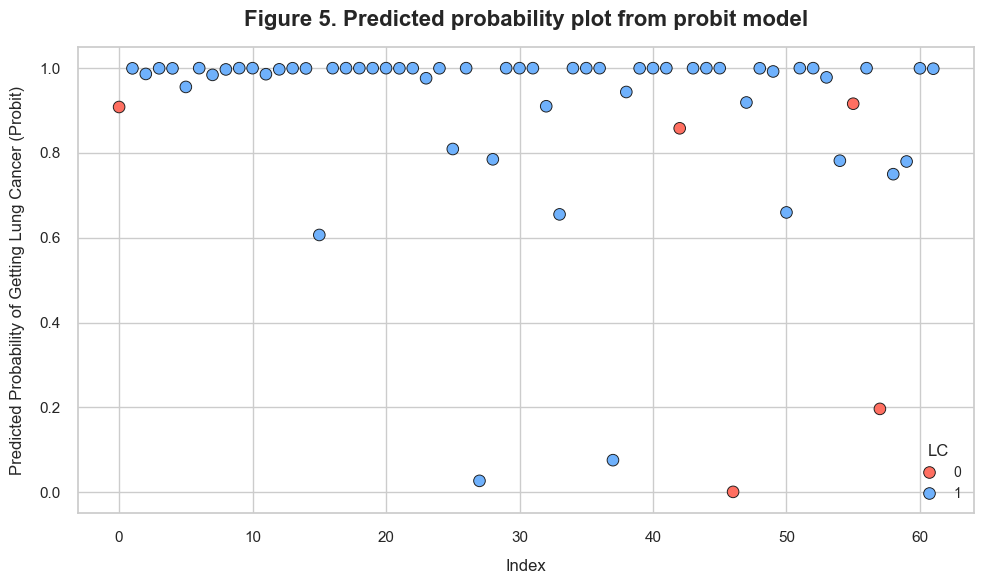

In [212]:
# 예측 확률 및 실제값 정리
data_probit = pd.DataFrame({
    'Index': range(len(probit_preds_prob)),
    'Predicted Probability': probit_preds_prob,
    'LC': y_test
})

sns.set_theme(style="whitegrid")

# Probit 모델 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_probit,
    x='Index',
    y='Predicted Probability',
    hue='LC',
    palette={0: '#FF6F61', 1: '#6FB1FC'}, 
    edgecolor='k',
    s=70 
)
plt.title('Figure 5. Predicted probability plot from probit model', fontsize=16, weight='bold', pad=15)
plt.xlabel('Index', fontsize=12, labelpad=10)
plt.ylabel('Predicted Probability of Getting Lung Cancer (Probit)', fontsize=12, labelpad=10)
plt.legend(title='LC', loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

## ML

### 의사결정트리

In [256]:
def decision_tree(X_train, y_train):
    pipe = make_pipeline(
        SimpleImputer(),
        StandardScaler(), 
        DecisionTreeClassifier(random_state=42, criterion='entropy')
    )
    params = {
        "decisiontreeclassifier__max_depth" : [3,4,5,6,7], # 트리의 최대 깊이
        "decisiontreeclassifier__min_samples_split" :[2,3] # 분할을 위한 최소 샘플 수
    }
    clf = RandomizedSearchCV(
        pipe, 
        param_distributions=params, 
        n_iter=10,  # 랜덤 탐색 횟수
        cv=5, # 폴드 수
        scoring='accuracy', # 평가 지표
        n_jobs=-1, # 병렬 처리
        random_state=42  # 랜덤 상태 고정
    )
    clf.fit(X_train, y_train)
    model = clf.best_estimator_
    return model


In [258]:
dt = decision_tree(X_train, y_train)

In [268]:
print(dt)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=42))])


### RandomForest

In [263]:
def random_forest_small_data(X_train, y_train):
    pipe = make_pipeline(
        SimpleImputer(),
        StandardScaler(),
        RandomForestClassifier(random_state=42)
    )
    params = {
        "randomforestclassifier__n_estimators": [10, 50],
        "randomforestclassifier__max_depth": [3, 5, 10], # 트리의 최대 깊이
        "randomforestclassifier__min_samples_split": [2, 3], # 분할을 위한 최소 샘플 수
    }
    clf = RandomizedSearchCV(
        pipe,
        param_distributions=params,
        n_iter=5,  # 랜덤 탐색 횟수
        cv=3,  # 폴드 수
        scoring='accuracy',  # 평가 지표
        n_jobs=-1,  # 병렬 처리
        random_state=42  # 랜덤 상태 고정
    )
    clf.fit(X_train, y_train)
    model = clf.best_estimator_
    return model

In [264]:
rf = random_forest_small_data(X_train, y_train)

In [269]:
print(rf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=3,
                                        n_estimators=10, random_state=42))])


### SVC

In [271]:
def support_vector(X_train, y_train):
    pipe = make_pipeline(
        SimpleImputer(),
        StandardScaler(),
        SVC(random_state=42)
    )
    params = {
        "svc__C": [0.1, 1, 10],  # 정규화 파라미터
        "svc__kernel": ['linear', 'rbf'],  # 커널 종류
        "svc__gamma": ['scale', 'auto']  # 감마 값
    }
    clf = RandomizedSearchCV(
        pipe,
        param_distributions=params,
        n_iter=3,  # 탐색 횟수를 줄임
        cv=3,  # 3-폴드 교차 검증
        scoring='accuracy',  # 평가 지표
        n_jobs=-1,  # 병렬 처리
        random_state=42  # 랜덤 상태 고정
    )
    clf.fit(X_train, y_train)
    model = clf.best_estimator_
    return model

In [280]:
svc = support_vector(X_train, y_train)
print(svc)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=10, gamma='auto', kernel='linear', random_state=42))])


### KNN

In [274]:
def kneighbors(X_train, y_train):
    pipe = make_pipeline(
        SimpleImputer(),
        StandardScaler(),
        KNeighborsClassifier()
    )
    params = {
        "kneighborsclassifier__n_neighbors": [3, 5, 7],  # 이웃의 수
        "kneighborsclassifier__weights": ['uniform', 'distance'],  # 가중치 방식
        "kneighborsclassifier__metric": ['euclidean', 'manhattan']  # 거리 측정 방법
    }
    clf = RandomizedSearchCV(
        pipe,
        param_distributions=params,
        n_iter=3,  # 탐색 횟수를 줄임
        cv=3,  # 3-폴드 교차 검증
        scoring='accuracy',  # 평가 지표
        n_jobs=-1,  # 병렬 처리
        random_state=42  # 랜덤 상태 고정
    )
    clf.fit(X_train, y_train)
    model = clf.best_estimator_
    return model

In [276]:
knn = kneighbors(X_train, y_train)
print(knn)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=3))])


### GDB

In [277]:
def gradient_boosting(X_train, y_train):
    pipe = make_pipeline(
        SimpleImputer(),
        StandardScaler(),
        GradientBoostingClassifier(random_state=42)
    )
    params = {
        "gradientboostingclassifier__n_estimators": [50, 100],  # 트리 개수
        "gradientboostingclassifier__learning_rate": [0.01, 0.1],  # 학습률
        "gradientboostingclassifier__max_depth": [3, 5],  # 트리의 최대 깊이
        "gradientboostingclassifier__min_samples_split": [2, 5],  # 분할을 위한 최소 샘플 수
        "gradientboostingclassifier__min_samples_leaf": [1, 2],  # 리프 노드의 최소 샘플 수
    }
    clf = RandomizedSearchCV(
        pipe,
        param_distributions=params,
        n_iter=3,  # 탐색 횟수를 줄임
        cv=3,  # 3-폴드 교차 검증
        scoring='accuracy',  # 평가 지표
        n_jobs=-1,  # 병렬 처리
        random_state=42  # 랜덤 상태 고정
    )
    clf.fit(X_train, y_train)
    model = clf.best_estimator_
    return model

In [279]:
gdb = gradient_boosting(X_train, y_train)
print(gdb)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, min_samples_leaf=2,
                                            random_state=42))])


### 모델 테스트 비교

In [292]:
def model_pred_results(models, X_test, y_test):
    # 결과 저장 리스트
    results = []
    for name, model in models.items():
        # 모델 예측
        pred = model.predict(X_test)
        # 성능 지표 계산
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average='weighted')
        recall = recall_score(y_test, pred, average='weighted')
        f1 = f1_score(y_test, pred, average='weighted')
        
        results.append({
            "모델": name,
            "정확도": accuracy,
            "정밀도": precision,
            "재현율": recall,
            "F1 Score": f1
        })
    results_df = pd.DataFrame(results)
    return results_df

In [294]:
models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "Support Vector": svc,
    "K-Nearest Neighbors": knn,
    "Gradient Boosting": gdb
}

results = model_pred_results(models, X_test, y_test)
results

,모델,정확도,정밀도,재현율,F1 Score
0,Decision Tree,0.903226,0.920486,0.903226,0.910426
1,Random Forest,0.935484,0.926371,0.935484,0.927976
2,Support Vector,0.919355,0.912125,0.919355,0.915225
3,K-Nearest Neighbors,0.887097,0.896985,0.887097,0.891729
4,Gradient Boosting,0.870968,0.892250,0.870968,0.880568


### BEST : Random Forest

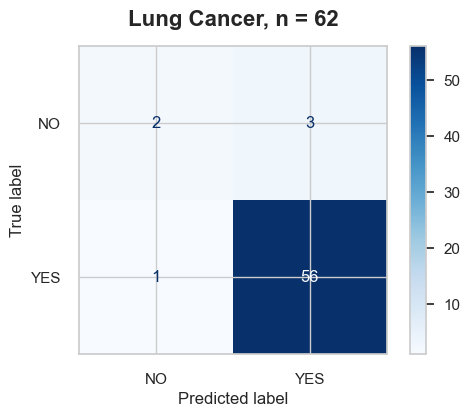

In [316]:
y_pred = rf.predict(X_test)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)
# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO", "YES"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Lung Cancer, n = {len(y_test)}', fontsize=16 ,weight='bold', pad=15)
plt.show()


#### 결론 - 데이터 변경 고려 (크기 및 Skew)